In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Mallco Malls wants to find out more about their client base and use that information to bring more customers in to profit from the stores. With that they collected a subset of information from their clients through surveys conducted on the grounds.  With this data I will be looking for trends and give recommendations based off of what I find

In [57]:
warnings.filterwarnings('ignore')
data = pd.read_csv('Data/Mall_Customers.csv')

# Data Preprocessing

In [59]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dropping Customer ID because we don't need it

In [61]:
data.drop(['CustomerID'],axis = 1,inplace = True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [63]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [64]:
data = data.rename({'Genre':'Sex'},axis = 1)

In [65]:
corr = data.corr()

In [66]:
corr.shape

(3, 3)

<AxesSubplot:>

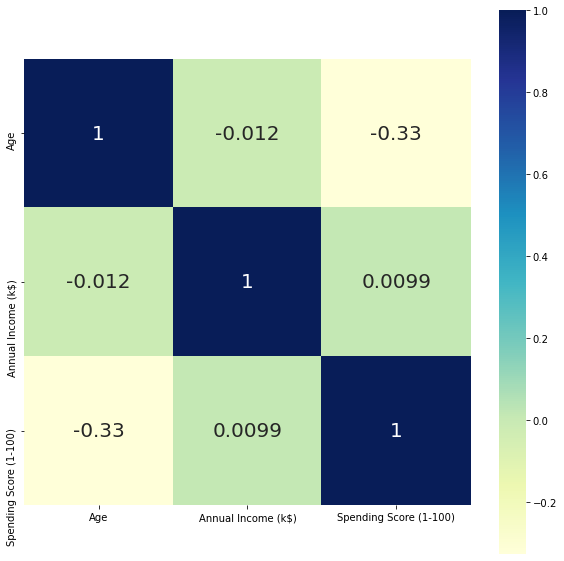

In [67]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar=True, square= True, annot=True, annot_kws={'size':20}, cmap='YlGnBu')

# Visualizations

In [68]:
data.head()

,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Fixing columns to remove spaces

In [69]:
data.columns = data.columns.str.replace(' ','_')

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Count'>

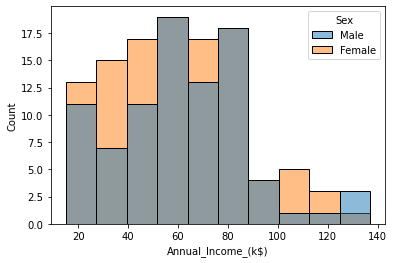

In [70]:
sns.histplot(data,x = 'Annual_Income_(k$)',hue = 'Sex')

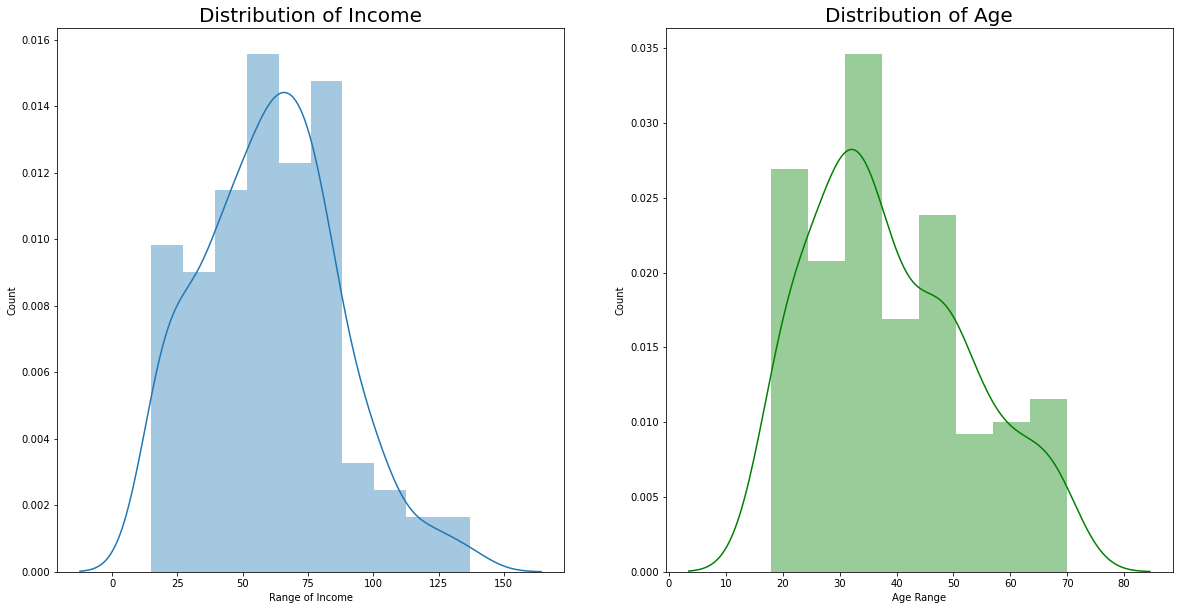

In [71]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.distplot(data['Annual_Income_(k$)'])
plt.title('Distribution of Income',fontsize = 20)
plt.xlabel('Range of Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(data['Age'],color = 'green')
plt.title('Distribution of Age',fontsize = 20)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

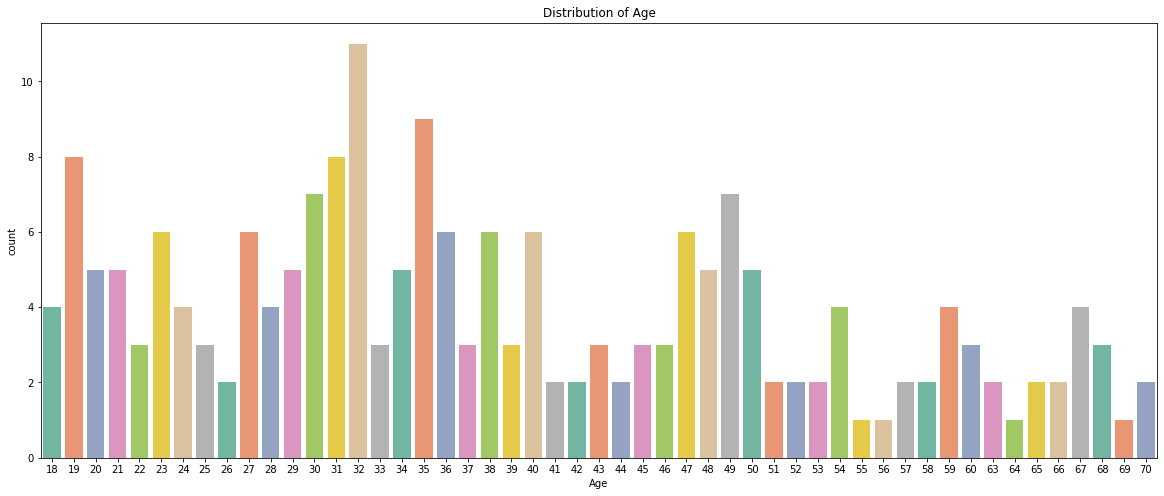

In [76]:
plt.figure(figsize = (20,8))
sns.countplot(data['Age'],palette = "Set2")
plt.title('Distribution of Age',fontsize =12)

<AxesSubplot:xlabel='Spending_Score_(1-100)', ylabel='Density'>

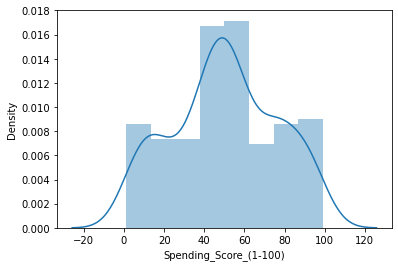

In [79]:
sns.distplot(data['Spending_Score_(1-100)'])

In [80]:
temp = data.groupby('Sex')['Spending_Score_(1-100)'].agg(['mean','min','max'])
temp = pd.DataFrame(temp)
temp

,mean,min,max
Sex,,,
Female,51.526786,5,99
Male,48.511364,1,97


As we can see women statistically spend more than men. What about by age?

In [82]:
temp = data.groupby('Age')['Spending_Score_(1-100)'].agg(['mean','min','max'])
temp = pd.DataFrame(temp)
temp

,mean,min,max
Age,,,
18,60.000000,41,92
19,39.750000,5,59
20,40.200000,5,75
21,66.800000,42,81
22,70.000000,55,79
23,63.333333,29,94
24,71.500000,52,92
25,39.666667,12,73
26,54.500000,54,55


Statistically people around the age of 18-40 spend more

# Final thoughts
My final thoughts on this would be to recommend implimenting sales geared more towards women at the stores themselves and to target more around the ages below 40. 